In [ ]:
import numpy as np
import pandas as pd
dados = pd.read_csv("dados.csv")
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.74
1,11,1,23,2,12,1150,1.57
2,11,1,35,8,15,880,1.71
3,11,0,46,2,6,3500,1.70
4,11,1,47,8,9,150,1.84
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.55
76836,53,0,30,4,7,1500,1.72
76837,53,0,32,8,12,1300,1.83
76838,53,0,57,8,4,1500,1.57


In [ ]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
dados['Cor'].value_counts(normalize = True)*100

8    46.752993
2    41.404217
4    10.920094
0     0.464602
6     0.458095
Name: Cor, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


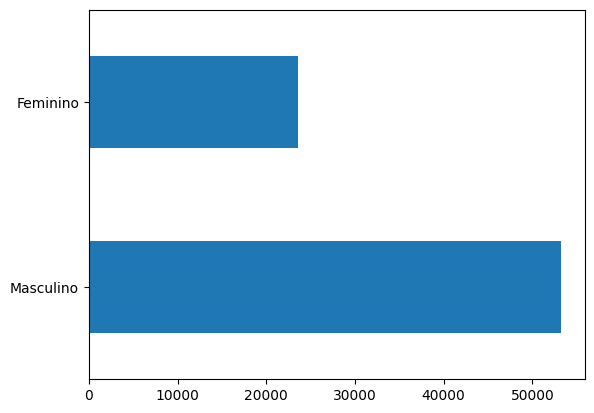

In [ ]:
dist_freq_qualitativas['Frequência'].plot.barh(rot=0);

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


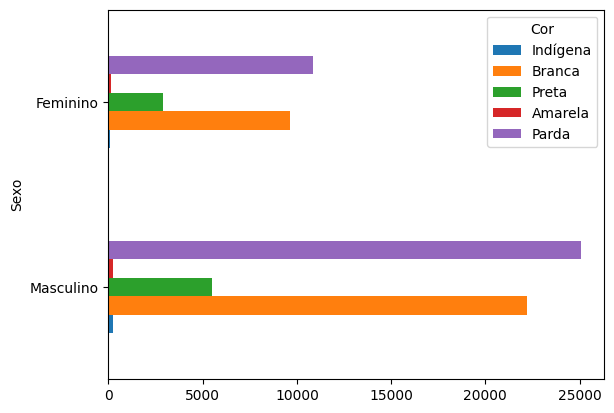

In [ ]:
frequencia.plot.barh(rot=0);

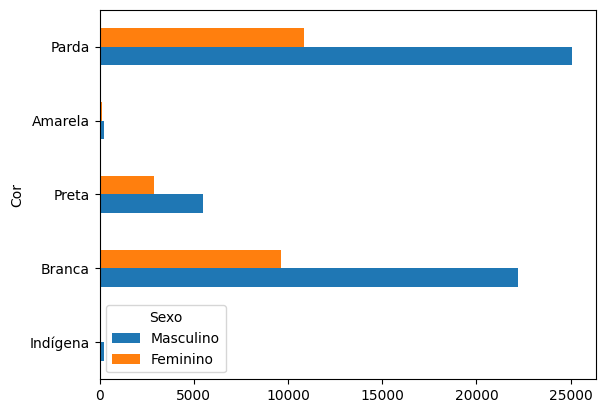

In [ ]:
frequencia.T.plot.barh(rot=0);

In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor, normalize=True)*100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


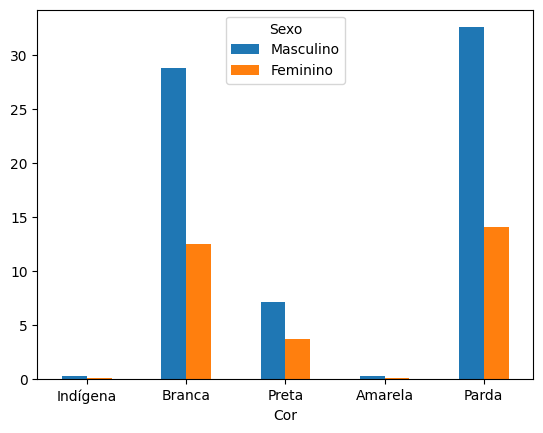

In [ ]:
percentual.T.plot.bar(rot=0);

In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


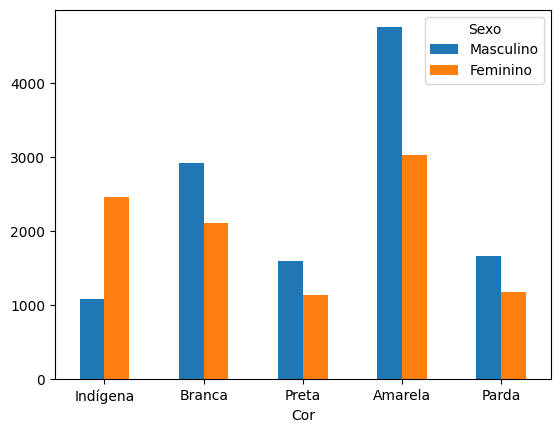

In [ ]:
percentual.T.plot.bar(rot=0);

In [ ]:
min(dados["Renda"])

0

In [ ]:
max(dados["Renda"])

200000

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


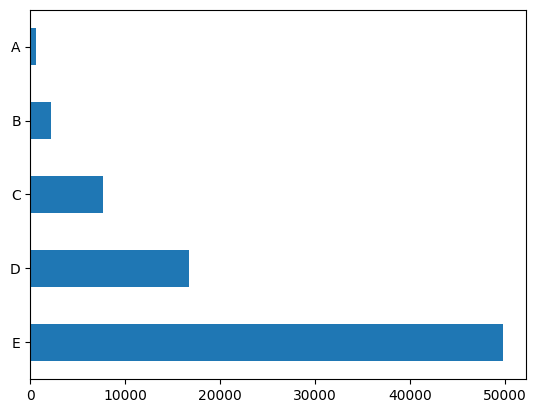

In [ ]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.barh(rot=0);